# Atividade 1 - Teste de Hipótese para uma amostra

Fazer o teste de Hipótese para o problema abaixo

A quantidade de calorias de um produto (v.a. X) é tal que $X \sim N(\mu, \sigma^2)$
).<br>Onde: <br>
$\mu$ = média populacional e <br>
$\sigma^2$ = variância populacional.<br>
Para a indústria, $\mu = 31$, mas para a Agência Reguladora $\mu \neq 31$. Para avaliar quem está com a razão foi tirada uma amostra de tamanho $25$ desse produto, cujos valores são apresentados no arquivo ```Amostras-Industria.csv``` (publicado no classroom).


1. Formule as Hipótese $H_0$:  e $H_1$:
2. Defina o nível de significância $\alpha = 1 - \text{IC}$, onde $\text{IC}$ é o intervalo de confiança. (Ex.: para um intervalo de confiança de $95\%$, $\alpha = 5\% = 0.05$.
3. Realize o procedimento abaixo e tire sua conclusão.

## 1.1 Formulação da hipótese nula e da hipótese alternativa

$H_0: \mu = 31$ \
$H_1: \mu \neq 31$

Portanto, estamos interessados no teste t de Students, para uma amostra, bicaudal

## 1.2 Importando os módulos necessários

In [50]:
import pandas as pd
import math
from scipy import stats as st

## 1.3 Definindo a função para o cálculo do teste t

$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$\
onde\
$\bar{x}$ é a média amostral\
$\mu_0$ é a média populacional\
$s$ é o desvio padrão\
$n$ e o número de observações

In [51]:
def t_test(mu_0, n, xbar, sd):
    """Calculate t test"""
    return (xbar - mu_0) / (sd / math.sqrt(n))

## 1.4 Carregando os dados

In [52]:
df=pd.read_csv("../dados/dados_brutos/Amostras-Industria.csv", usecols=['Cal'])

In [53]:
df.head(3)

,Cal
0,30.55
1,29.88
2,28.95


## 1.5 Definindo as variáveis

$t_c = 2.064$, t crítico, obtido na tabela para $\alpha = 0.05$ e $\text{df} = n - 1 = 25 - 1 = 24$, considerando a tabela para duas caudas.

In [54]:
mu_0 = 31 # Média de calorias alegada pela industria
n = len(df['Cal']) # nº de observações
t_critico = 2.064 # t crítico bicaudal obtido na tabela t de student para
                    # alfa = 0.05 = 5%
xbar = df['Cal'].mean() # média da amostra [g]
sd = df['Cal'].std() # desvio padrão [g]

## 1.6 Cálculo do valor de t

In [55]:
t = t_test( mu_0, n, xbar, sd)

print(f"Valor de t: {t}")

Valor de t: 2.6999430318030373


## 1.7 Discutindo os resultados

Como $ t > t_c$ ou $t < -tc$, está fora do intervalo de aceitação de $H_0$, rejeitamos a hipótese nula. Portanto, a média das calorias é diferente de 31

# Atividade 2 - Repita o procedimento anterior para o problema abaixo:

Segundo os jornais, no Brasil  o número médio de linhas de celular por habitante  é  dois ($\mu=2$). Você gostaria de verificar se essa média  se repete na comunidade escolar de uma universidade com 5000 estudantes. Para isso vc fez um experimento. Coletou informações sobre o número de linhas   de uma amostra com 30 estudante. Agora vc deseja saber com, sigficância de 2%

## 2.1 Criando o Data Set

Com a biblioteca Pandas



In [56]:
# Criando o DataSet da comunidade Universitária
Estudantes=pd.DataFrame({"X":st.binom.rvs(4, 0.5, size=5000)})
Estudantes.head(10)

,X
0,2
1,4
2,2
3,2
4,3
5,2
6,2
7,3
8,4
9,1


## 2.2 Selecionando uma amostra

Amostra com 30 indivíduos e seleção sem reposição

In [57]:
# extraíndo uma amostra aleatória simples
amostra=Estudantes.sample(30,replace=False,)
amostra.head(3)

,X
2613,2
2170,2
3443,2


In [58]:
amostra.to_csv('../dados/dados_brutos/amostra_universitarios.csv', index=False)

## 2.3 Executando o teste de Hipotese

Fazer o teste de Hipótese para a significância solicitada (2%)

### Definindo a hipótese nula e a hipótese alternativa
$H_0: \mu = 2$ \
$H_1: \mu \neq 2$

Portanto, estamos interessados no teste t de Students, para uma amostra, bicaudal


### Definições dos valores

In [59]:
mu_0 = 2 # Média do número de celulares da população
n = len(amostra['X']) # nº de observações
t_critico = 2.462 # t crítico bicaudal obtido na tabela t de student para
                    # alfa = 0.02 = 2%
xbar = amostra['X'].mean() # média da amostra [g]
sd = amostra['X'].std() # desvio padrão [g]

### Cálculo do teste t

In [60]:
t = t_test(mu_0, n, xbar, sd)
print(f"Valor de t: {t}")

Valor de t: 0.46520738434354464


In [61]:
max(-t,-t_critico)

-0.46520738434354464

## 2.4 Qual foi sua conclusão?

A média da comunidade universitária  é igual à brasileira?

### Discussão
Como o valor de $-t > -t_c$, aceitamos a hipótese nula e, portanto, a média da comunidade universitária é igual a média da comunidade brasileira

### Aplicando o teste t do Scipy

In [62]:
t_scipy = st.ttest_1samp(amostra['X'], popmean=2, alternative='two-sided')

In [63]:
t_scipy

TtestResult(statistic=0.46520738434354464, pvalue=0.6452574929886916, df=29)

In [64]:
max(0.01,t_scipy[1]) 

0.6452574929886916

O teste t do Scipy confirma que não podemos rejeitar a hipótese nula, pois $\text{pvalue} > 0.01$, onde $0.01 = 0.02 / 2$, ou seja, 1% em cada cauda.

# Atividade 3

Teste de hipótese  A/B

Controle/Tratamento

## 3.1 Carregar o Data Set

Fazer Upload do Arquivo: BaseTeste_A_B.csv

## 3.2 Criar Data Frame com as duas Variáveis

Controle e teste

In [65]:
grupos=pd.read_csv("../dados/dados_brutos/Baseteste_A_B.csv")
grupos

,Controle,Teste
0,26.0,17
1,20.0,31
2,70.0,28
3,16.0,21
4,26.0,50
5,38.0,21
6,32.0,20
7,45.0,51
8,49.0,10
9,32.0,22


### Verificando os dados faltantes (NaNs)

In [66]:
grupos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Controle  10 non-null     float64
 1   Teste     13 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 340.0 bytes


### Verificando outliers

<Axes: >

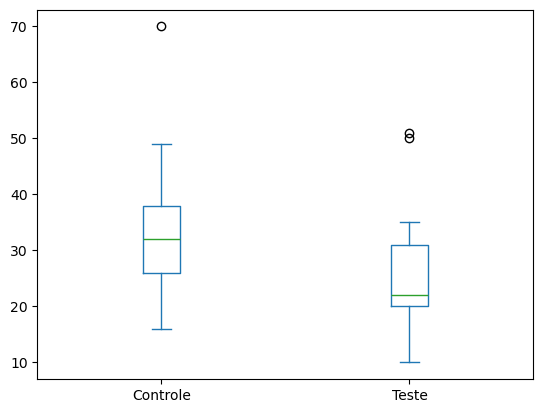

In [73]:
grupos.plot.box()

### Valores faltantes

Como se pode ver nos dados acima, existem valores faltantes (NaN). Quais os procedimentos tomar, neste caso, depende da natureza, da origem e da finalidade dos dados. Pode-se substituir os NaNs pela média/mediana, substituir por um valor específico (por exemplo, 0) ou remover o observável (toda a linha). Na ausência de informações acerca dos dados, e considerando a existência de _outliers_ no grupo de controle, vamos **substituir os NaNs pela mediana**, pois esta é mais robusta, em relação aos _outliers_.

In [67]:
grupos['Controle'].isna().sum()

3

In [68]:
mediana_controle = grupos['Controle'].median()
grupos['Controle'] = grupos['Controle'].fillna(mediana_controle)

In [69]:
grupos

,Controle,Teste
0,26.0,17
1,20.0,31
2,70.0,28
3,16.0,21
4,26.0,50
5,38.0,21
6,32.0,20
7,45.0,51
8,49.0,10
9,32.0,22


## 3.3 Aplicando o teste de hipótese

Controle e teste são os dois grupos a serem comparados

In [70]:
res= st.ttest_ind(grupos["Controle"],grupos["Teste"])
res

TtestResult(statistic=1.4507266503025307, pvalue=0.15980143782463, df=24.0)

## 3.4 Tirando as conclusões
Houve diferença entre os dois grupos??

Controle e teste

### Discussão

O objetivo é verificar se os dois grupos apresentam médias iguais. Com isto, definimos nossas hipótese nula e hipótese alternativa

$
H_0: \bar{x_1} = \bar{x_2} 
$\
$
H_1: \bar{x_1} \neq \bar{x_2} 
$



Dentro de um valor de confiança de $95\%$, portanto, sendo $\alpha = 0.05$ e $\text{p-value} = 0.1598$, $\text{p-value} > \alpha$, falhamos em rejeitar a hipótese nula. Portanto, **as médias são iguais**.